## Testing out QUIT for VFA T1 mapping
Hi Tobias!
I have 4 SPGR images with flip angles 2,5,10,15 and I'd like to demonstrate your T1 mapping tools on it. I've successfully run your example_notebook.ipynb so my installation seems to have worked fine. 

## Imports

In [26]:

from QUIT.interfaces.relax import DESPOT1, DESPOT1Sim, DESPOT2
from nanslice import Layer
import nanslice.jupyter as ns
import nibabel as nib
import numpy as np
import requests
import gzip
import os.path
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.use('Agg')
%matplotlib inline
from matplotlib import pylab
from pylab import annotate, axis
from PIL import Image



#$ fslmerge -t MR_Fast_SPGR_MERGE.nii.gz MR_series_7_FAST_SPGR_2DEG.nii.gz MR_series_6_Fast_SPGR_5DEG.nii.gz MR_series_5_Fast_SPGR_10DEG.nii.gz MR_series_4_Fast_SPGR_15DEG.nii.gz


## Prepare data
Concatenate all 4 SPGR images into one using fslmerge

In [7]:
# I have 4 3d SPGR images, flip angles 2,5,10,15
# in terminal, run fslmerge:
#fslmerge
#Usage: fslmerge <-x/y/z/t/a/tr> <output> <file1 file2 .......> [tr value in seconds]
#     -t : concatenate images in time

# for example:
#$ fslmerge -t MR_Fast_SPGR_MERGE.nii.gz MR_series_7_FAST_SPGR_2DEG.nii.gz MR_series_6_Fast_SPGR_5DEG.nii.gz MR_series_5_Fast_SPGR_10DEG.nii.gz MR_series_4_Fast_SPGR_15DEG.nii.gz


## Using DESPOT1 function

In [53]:

# Need clarification on how to specify d1seq - I have 4 SPGR (4 flip angles: 2,5,10,15), is this correct format?
d1seq = {'SPGR': {'TR': 4e-3, 'FA': [2,5,10,15]}}

d1 = DESPOT1(sequence=d1seq, in_file='MR_Fast_SPGR_MERGE.nii.gz', prefix='BIO_air')
# I know this is proably the wrong way to specify more than one infile - getting syntax error- help?

d1_result = d1.run() 
# can I specify the name of the T1map output file? I assume it comes out as T1.nii.gz but can I change that


## Display T1 map

In [54]:
t1map=nib.load('BIO_airD1_T1.nii.gz')


In [55]:
t1map.shape
img_data = t1map.get_fdata()
img_data[100,100,7]

1.4449717998504639

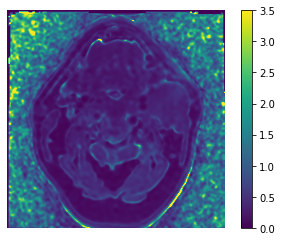

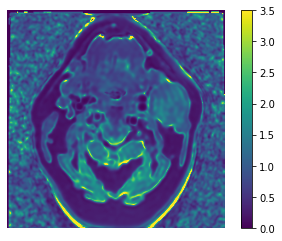

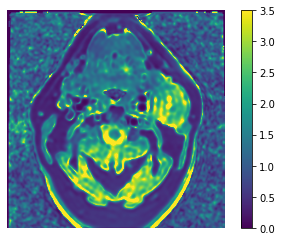

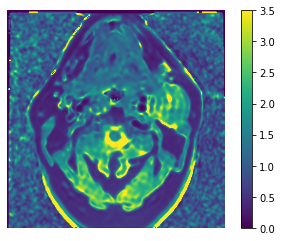

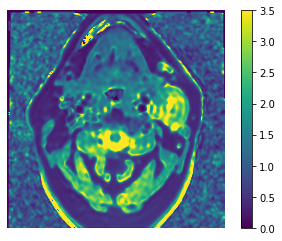

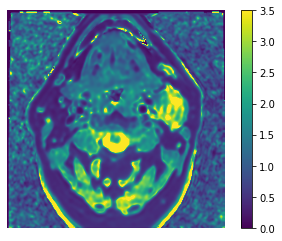

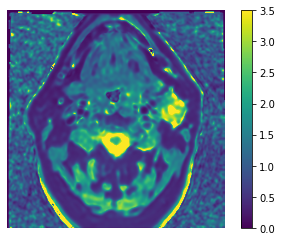

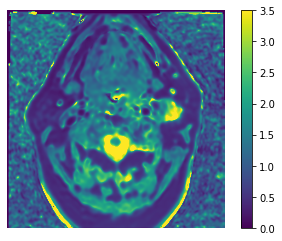

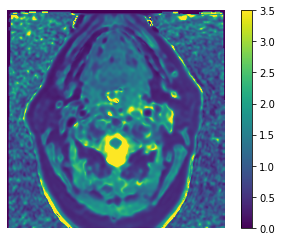

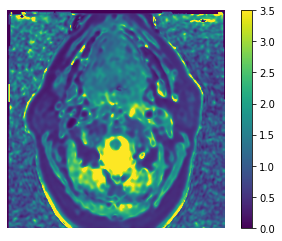

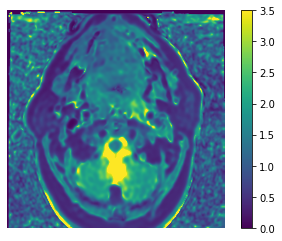

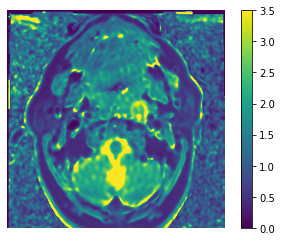

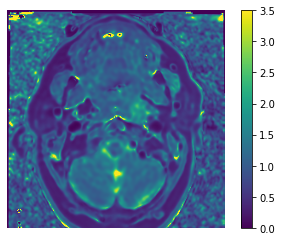

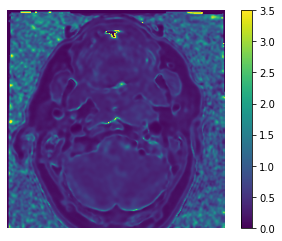

In [57]:

# display some slices to check things loaded alright
slice_display_counter=1
slice_counter=0

for i in range(0,14):
    #plt.subplot(2,7,slice_display_counter)
    plt.axis('off')
    im_slice=np.fliplr(np.rot90(img_data[:,:,slice_counter]))
    plt.imshow(im_slice)
    slice_counter+=1
    slice_display_counter+=1
    plt.clim(0,3.5)
    plt.colorbar()
    plt.show()
    #plt.savefig(str(slice_counter)+'slices_demo.png')


